In [5]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from helpers import *
from implementations import *
from crossvalidation import *
from preprocessing import *
from plots import choose_max_iter
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


IMPORTING TRAINING DATA

In [6]:
current_path = './'
folder = 'data/' 
file_name = 'train.csv'
path = current_path+folder+file_name
y_train,tx,ids,features = load_train_data(path)

IDENTIFYING THE COLUMNS HAVING MISSING VALUES

In [7]:
nan_per_columns = np.sum(np.isnan(tx),axis = 0)

In [8]:
median_mass = np.nanmedian(tx[:,0])
index = np.isnan(tx[:,0])
tx[index,0] = median_mass
tx = tx[:,nan_per_columns <= nan_per_columns[0]]

In [9]:
y_train,tx_train = reject_outliers(y_train,tx,3)

In [10]:
tx_train,mean,std = standardize(tx_train)

0.5788195592539676


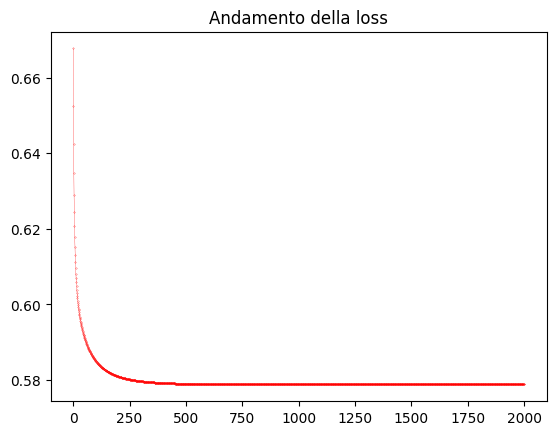

In [20]:
# max iter 500 è più che sufficiente
initial_w = np.zeros(tx_train.shape[1])
choose_max_iter(y_train,tx_train,initial_w,max_iters = 2000, gamma = 0.3,method = 'logistic_regression')

In [11]:
sample_indices = np.random.permutation(len(y_train))[:int(0.2*len(y_train))]
y_sample = y_train[sample_indices]
tx_sample = tx_train[sample_indices,:]

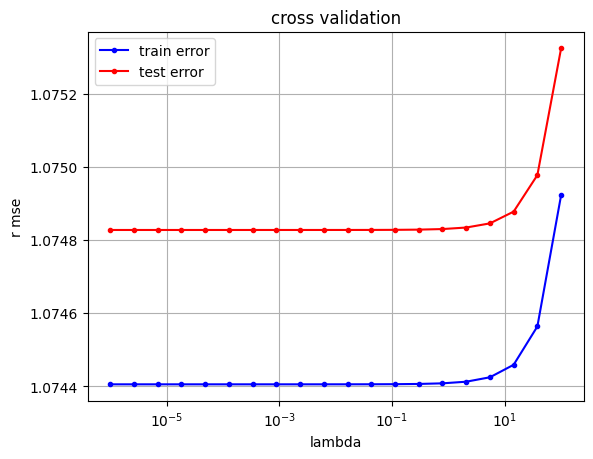

In [21]:
w = np.zeros(tx_train.shape[1])
best_lambda,_=cross_validation_demo(y_sample,tx_sample,k_fold=4,lambdas = np.logspace(-6,2,20),gamma = 0.3,initial_w = w, max_iters=500)

In [22]:
print(best_lambda)

1e-06


In [23]:
final_w,loss = reg_logistic_regression(y_train, tx_train,0.0001,w, max_iters=500, gamma=0.3)

In [24]:
final_w

array([ 0.05039038, -0.59795397, -0.8114176 ,  0.15818647,  0.79651931,
       -0.11302947,  0.10214219, -0.34825785,  0.24725159,  0.62385292,
       -0.00256016, -0.00170007,  0.59733544, -0.00169665,  0.0058562 ,
        0.20850356,  0.00201662, -0.15432027,  0.11758702, -0.15755067])

In [25]:
loss

0.579001780744587

In [26]:
file_name = 'test.csv'
test_path = current_path+folder+file_name
tx_test,test_ids = load_test_data(test_path)
tx_test = tx_test[:,nan_per_columns<=nan_per_columns[0]]
index = np.isnan(tx_test[:,0])
tx_test[index,0] = np.nanmedian(tx_test[:,0])

In [27]:
tx_test = (tx_test - mean) / std

In [28]:
prediction = predict(tx_test,final_w,threshold = 0.55)
prediction[:17]

array([-1, -1, -1,  1, -1, -1, -1, -1, -1,  1, -1, -1,  1, -1, -1, -1, -1])

In [108]:
create_submission(test_ids,prediction, ['Id','Prediction'],'.\output\prediction16102022_5.csv')